<a href="https://colab.research.google.com/github/PDDA-OPDU/MICP-Analytics/blob/main/Thomeer_Param_from_KGS_Data/Panel_Bvocc_Thomeer_Parameters_optimization_read_KGS_ver2.ipynb" 
    target="_parent"><img 
    src="https://colab.research.google.com/assets/colab-badge.svg" 
    alt="Open In Colab"/></a>

In [1]:
using_colab = True

In [2]:
if using_colab:


    !wget 'https://github.com/PDDA-OPDU/MICP-Analytics/raw/main/Thomeer_Param_from_KGS_Data/CORE_DATA_AND_DESCRIPTIONS_DATABASE_HPMI.xlsx'
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/STELLA_brief_ver2_backyard_grass_shoreline.ipynb
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_grass_shade_whiteshade.xlsx
    #https://github.com/Philliec459/Science-and-Technology-Society-Use-of-NASA-STELLA-Q2-Spectrometer/raw/main/data_white_FullSun.xlsx

    #!pip install altair
    #!pip install panel
    #!pip install pillow
    #!pip install jupyter_bokeh
    #!pip install altair_viewer
    #!pip install altair_transform
    !pip install scipy

    #!unzip photos


dyld[45388]: Library not loaded: /usr/local/opt/libunistring/lib/libunistring.2.dylib
  Referenced from: <6C399AFD-1783-33DE-B8D8-F154FD41D3AC> /usr/local/Cellar/wget/1.20.3_2/bin/wget
  Reason: tried: '/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/usr/local/opt/libunistring/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache), '/usr/local/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/usr/local/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/usr/local/Cellar/libunistring/1.2/lib/libunistring.2.dylib' (no such file), '/usr/local/lib/libunistring.2.dylib' (no such file), '/usr/lib/libunistring.2.dylib' (no such file, not in dyld cache)


# Gaussian Fit of HPMI data

## Load Python libraries

In [3]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns


import panel as pn

pn.extension(comms='colab')

from scipy.optimize import minimize
from scipy.optimize import curve_fit


# Load Data

## The following cells will load the HPMI data from Chicheng's Thesis data for line of Batch 1, 2 or 3. Activate the cell for the Batch of data that you want to process. 

## 1) Load  row of HPMI data starting at row A12:A130 for Pc and xxx12 to xxx130 for Sw

In [4]:
# Function to convert a number to an Excel-style column letter (supports beyond Z)
def get_column_letter(n):
    result = ""
    while n > 0:
        n, remainder = divmod(n - 1, 26)
        result = chr(65 + remainder) + result
    return result

# Specify the file path and sheet number
file_path = 'CORE_DATA_AND_DESCRIPTIONS_DATABASE_HPMI.xlsx'
sheet_number = 0  # Second sheet, as pandas uses zero-indexing

# Read the Pc values (same for all samples)
pc_values = pd.read_excel(file_path, sheet_name=sheet_number, usecols="A", skiprows=11, nrows=119)

# Initialize a dictionary to store data for each sample
data_dict = {}

# Loop through each sample (from column B onward)
# Adjust the range according to the number of samples we need to process
for sample_num in range(1, 36):  # Example for 51 samples, adjust as necessary
    column_letter = get_column_letter(sample_num + 1)  # +1 because 'B' is column 2
    #print(f"Processing sample {sample_num} (Column {column_letter})")

    # Read Sw values for the current sample
    sw_values = pd.read_excel(file_path, sheet_name=sheet_number, usecols=column_letter, skiprows=11, nrows=119)
    
    # Read Porosity for the current sample (assumed to be in row 8)
    porosity = pd.read_excel(file_path, sheet_name=sheet_number, usecols=column_letter, skiprows=7, nrows=1).iloc[0, 0]
    
    # Read Permeability for the current sample (assumed to be in row 9)
    permeability = pd.read_excel(file_path, sheet_name=sheet_number, usecols=column_letter, skiprows=8, nrows=1).iloc[0, 0]

    # Read Num of Pore systems for the current sample (assumed to be in row 10)
    Num_pore_sys = pd.read_excel(file_path, sheet_name=sheet_number, usecols=column_letter, skiprows=9, nrows=1).iloc[0, 0]
    #print(Num_pore_sys)

    # Store the data in the dictionary
    data_dict[f'Sample_{sample_num}'] = {
        'Pc': pc_values.values.flatten(),
        'Sw': sw_values.values.flatten(),
        'Porosity (%)': porosity,
        'Permeability': permeability,
        'Num_pore_sys': Num_pore_sys,
    }

# Now, data_dict contains the data for all samples, structured for easy access
#print(data_dict)

# Batch 1, 2, or 3 from the spreadsheet
Pc_batch = 1


# Auto




Pd1_calc= 14.02

Optimized parameters for Sample_1: 

 BV1=19.5, , G1=0.37, Pd1=19.97, 

 BV2=0.0,    G2=0.01, Pd2=881.0

Final minimized error (MSE): 3.3465


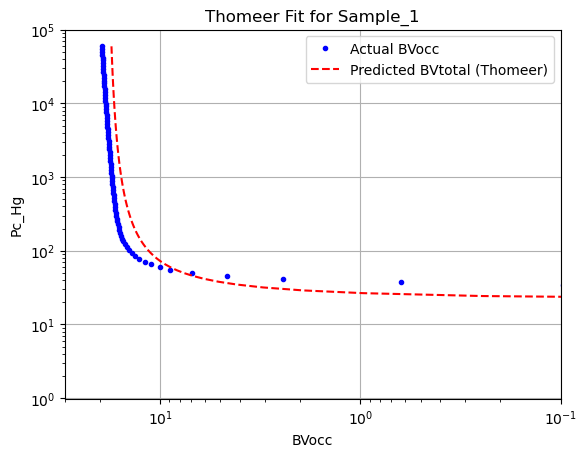

Bad result, optimization error is too high.



Pd1_calc= 10.04

Optimized parameters for Sample_2: 

 BV1=13.3, , G1=0.26, Pd1=5.32, 

 BV2=1.2,    G2=0.03, Pd2=704.18

Final minimized error (MSE): 0.1608


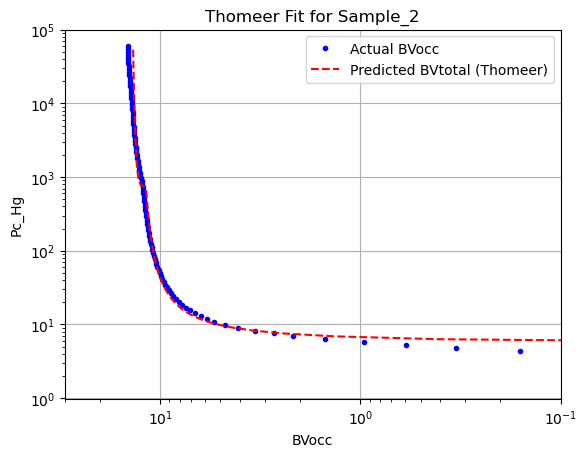




Pd1_calc= 10.04

Optimized parameters for Sample_3: 

 BV1=13.16, , G1=0.22, Pd1=7.8, 

 BV2=1.34,    G2=0.02, Pd2=775.86

Final minimized error (MSE): 0.1797


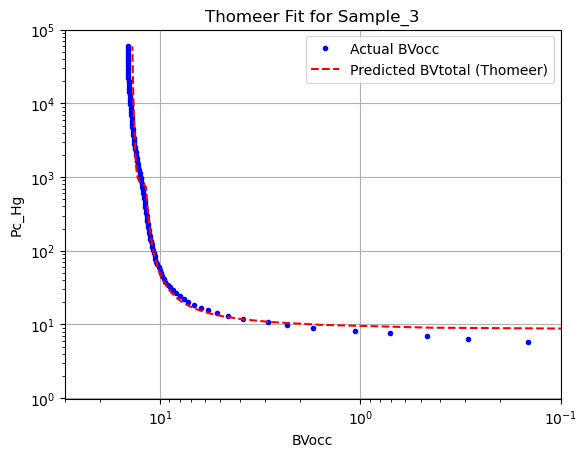




Pd1_calc= 28.68

Optimized parameters for Sample_4: 

 BV1=12.4, , G1=0.25, Pd1=14.34, 

 BV2=1.5,    G2=0.73, Pd2=174.11

Final minimized error (MSE): 0.5838


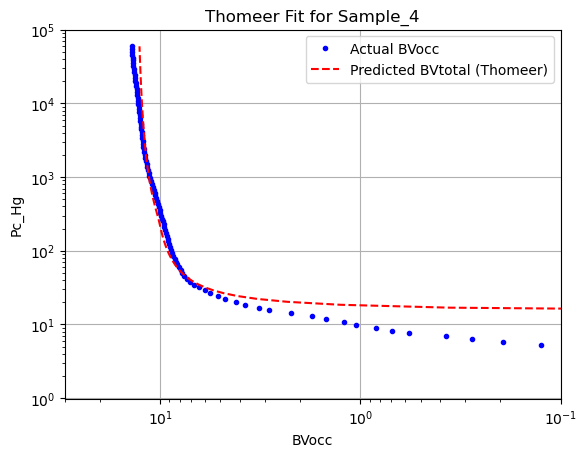




Pd1_calc= 28.68

Optimized parameters for Sample_5: 

 BV1=11.69, , G1=0.25, Pd1=14.34, 

 BV2=2.21,    G2=0.04, Pd2=406.19

Final minimized error (MSE): 0.3485


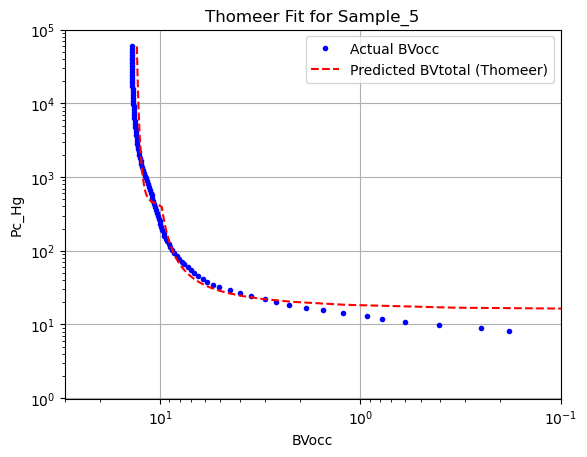




Pd1_calc= 46.6

Optimized parameters for Sample_6: 

 BV1=10.81, , G1=0.22, Pd1=26.88, 

 BV2=1.29,    G2=0.04, Pd2=926.79

Final minimized error (MSE): 0.1434


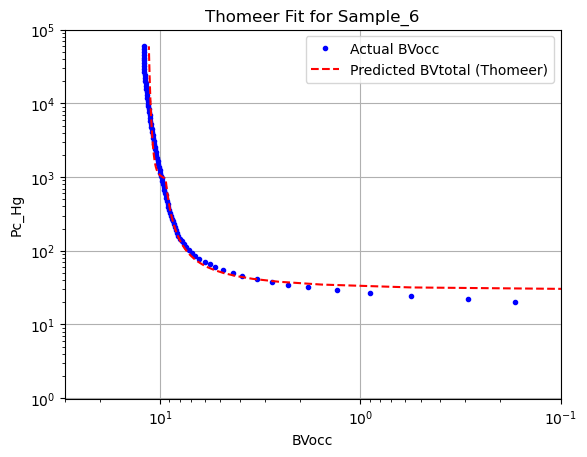




Pd1_calc= 16.24

Optimized parameters for Sample_7: 

 BV1=21.2, , G1=0.37, Pd1=19.35, 

 BV2=0.0,    G2=0.01, Pd2=881.0

Final minimized error (MSE): 1.1327


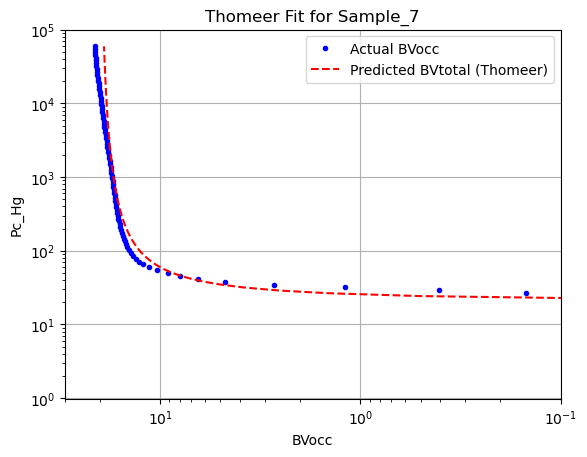

Bad result, optimization error is too high.



Pd1_calc= 89.69

Optimized parameters for Sample_8: 

 BV1=9.84, , G1=0.34, Pd1=58.23, 

 BV2=4.26,    G2=0.2, Pd2=1000.0

Final minimized error (MSE): 0.2731


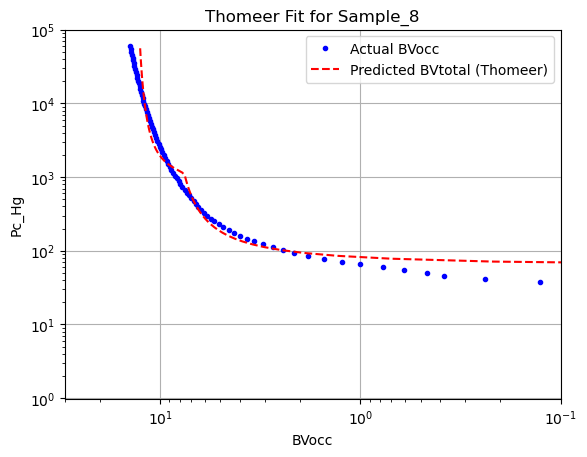




Pd1_calc= 53.09

Optimized parameters for Sample_9: 

 BV1=9.32, , G1=0.15, Pd1=62.66, 

 BV2=4.38,    G2=0.17, Pd2=229.0

Final minimized error (MSE): 0.1206


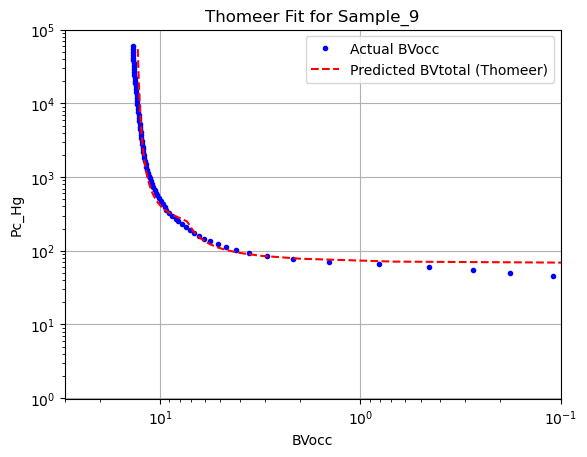




Pd1_calc= 13.45

Optimized parameters for Sample_10: 

 BV1=18.2, , G1=0.3, Pd1=20.18, 

 BV2=0.0,    G2=0.01, Pd2=881.0

Final minimized error (MSE): 1.1921


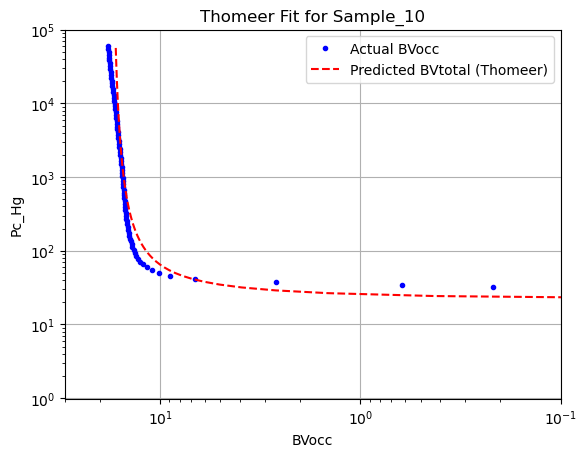

Bad result, optimization error is too high.



Pd1_calc= 31.25

Optimized parameters for Sample_11: 

 BV1=19.97, , G1=0.07, Pd1=26.31, 

 BV2=2.53,    G2=0.47, Pd2=1000.0

Final minimized error (MSE): 0.0931


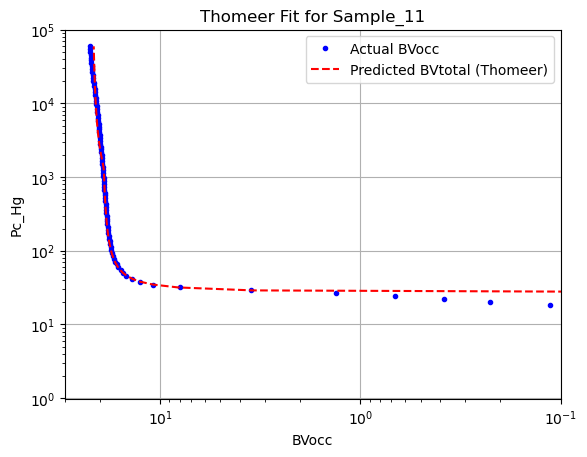




Pd1_calc= 33.7

Optimized parameters for Sample_12: 

 BV1=14.93, , G1=0.14, Pd1=45.06, 

 BV2=5.27,    G2=0.14, Pd2=117.94

Final minimized error (MSE): 0.1215


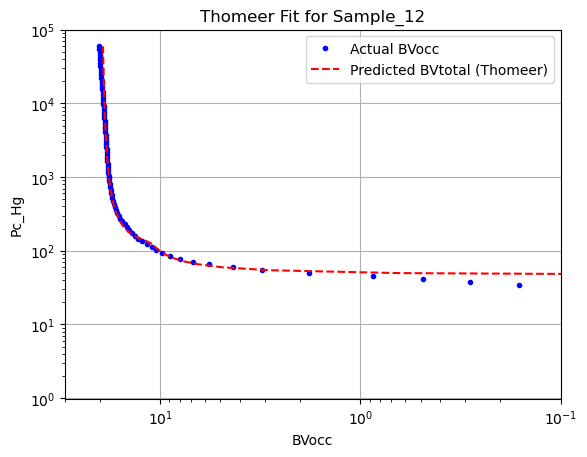




Pd1_calc= 37.45

Optimized parameters for Sample_13: 

 BV1=12.34, , G1=0.08, Pd1=41.81, 

 BV2=8.76,    G2=0.12, Pd2=76.07

Final minimized error (MSE): 0.2465


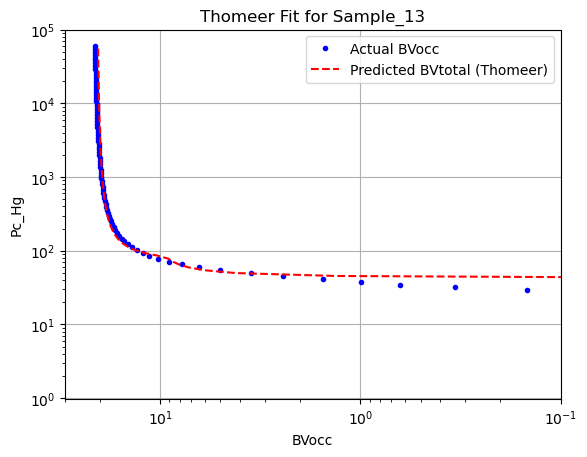




Pd1_calc= 56.47

Optimized parameters for Sample_14: 

 BV1=10.31, , G1=0.15, Pd1=60.15, 

 BV2=4.59,    G2=0.17, Pd2=291.36

Final minimized error (MSE): 0.142


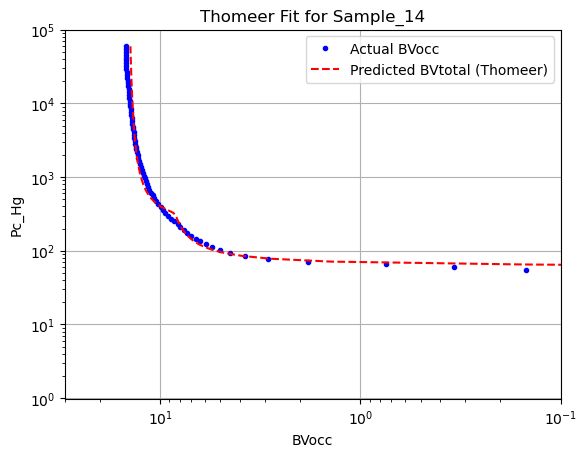




Pd1_calc= 43.53

Optimized parameters for Sample_15: 

 BV1=16.11, , G1=0.17, Pd1=65.3, 

 BV2=2.99,    G2=0.19, Pd2=151.48

Final minimized error (MSE): 0.1242


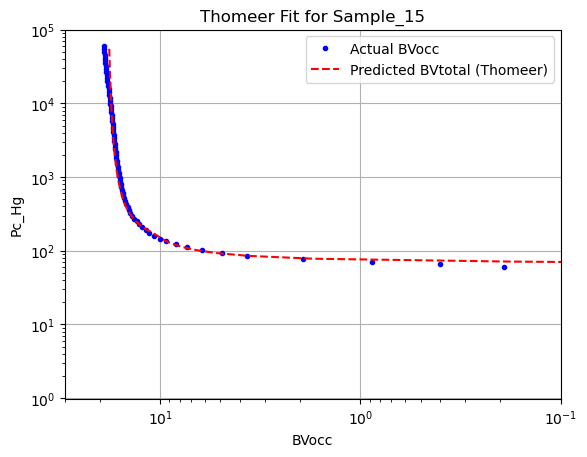




Pd1_calc= 61.05

Optimized parameters for Sample_16: 

 BV1=10.77, , G1=0.14, Pd1=62.12, 

 BV2=4.03,    G2=0.16, Pd2=222.93

Final minimized error (MSE): 0.1641


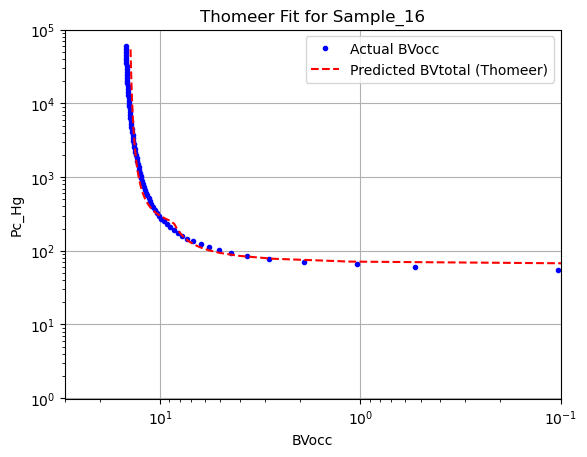




Pd1_calc= 71.29

Optimized parameters for Sample_17: 

 BV1=10.41, , G1=0.15, Pd1=83.12, 

 BV2=4.79,    G2=0.2, Pd2=244.21

Final minimized error (MSE): 0.1574


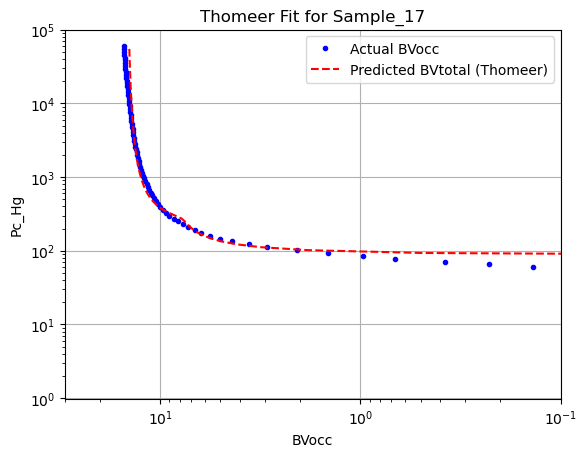




Pd1_calc= 87.07

Optimized parameters for Sample_18: 

 BV1=10.06, , G1=0.1, Pd1=123.93, 

 BV2=5.04,    G2=0.18, Pd2=181.62

Final minimized error (MSE): 0.1533


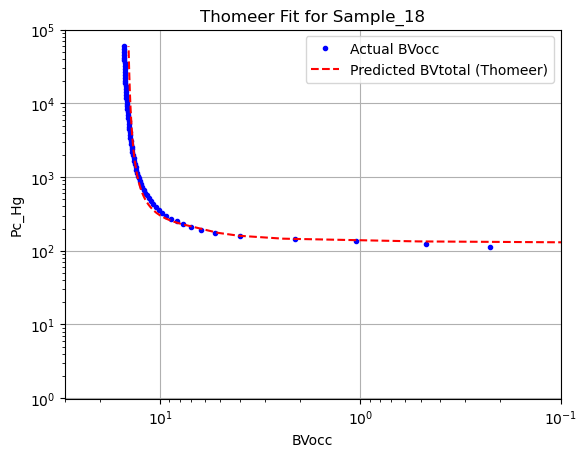




Pd1_calc= 543.2

Optimized parameters for Sample_19: 

 BV1=2.24, , G1=0.16, Pd1=814.81, 

 BV2=5.06,    G2=0.07, Pd2=392.35

Final minimized error (MSE): 0.0441


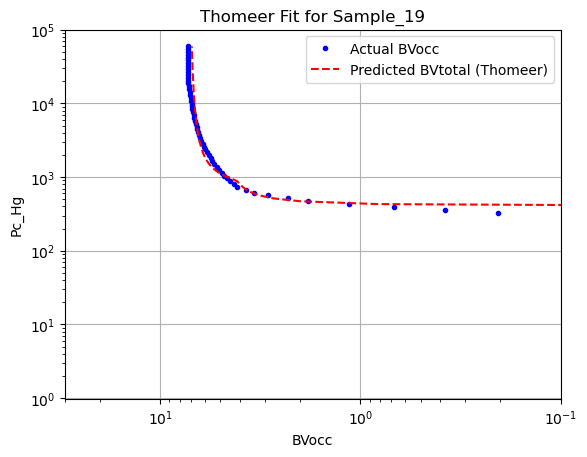




Pd1_calc= 748.66

Optimized parameters for Sample_20: 

 BV1=2.74, , G1=0.15, Pd1=664.27, 

 BV2=2.56,    G2=0.12, Pd2=203.96

Final minimized error (MSE): 0.042


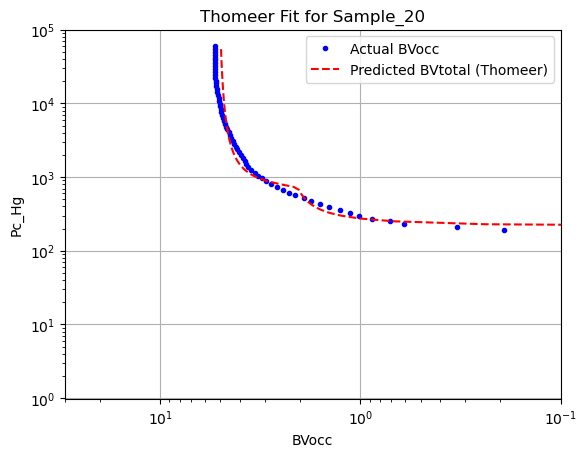




Pd1_calc= 148.37

Optimized parameters for Sample_21: 

 BV1=5.72, , G1=0.1, Pd1=109.51, 

 BV2=4.58,    G2=0.11, Pd2=328.03

Final minimized error (MSE): 0.115


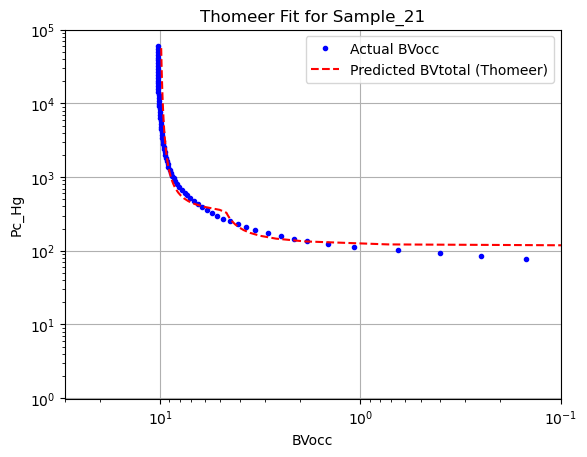




Pd1_calc= 140.4

Optimized parameters for Sample_22: 

 BV1=3.07, , G1=0.35, Pd1=210.6, 

 BV2=6.03,    G2=0.11, Pd2=54.27

Final minimized error (MSE): 0.1233


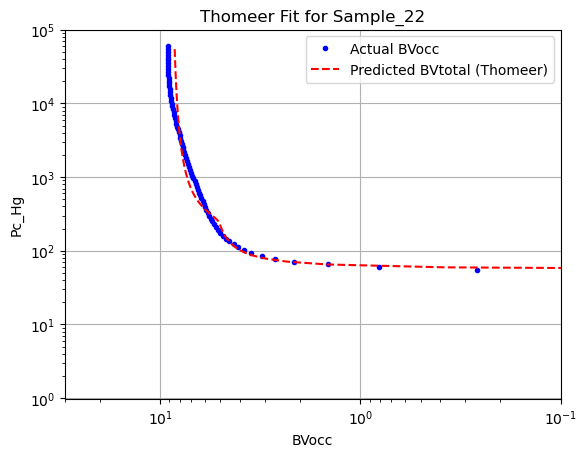




Pd1_calc= 133.65

Optimized parameters for Sample_23: 

 BV1=2.49, , G1=0.25, Pd1=200.47, 

 BV2=8.41,    G2=0.14, Pd2=94.98

Final minimized error (MSE): 0.2046


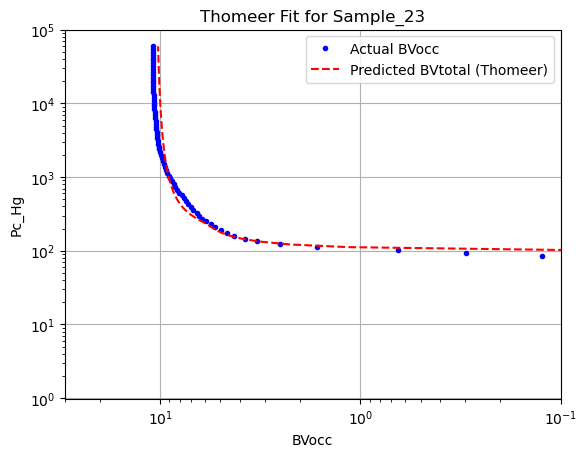




Pd1_calc= 185.72

Optimized parameters for Sample_24: 

 BV1=5.87, , G1=0.12, Pd1=278.58, 

 BV2=3.93,    G2=0.09, Pd2=146.27

Final minimized error (MSE): 0.1032


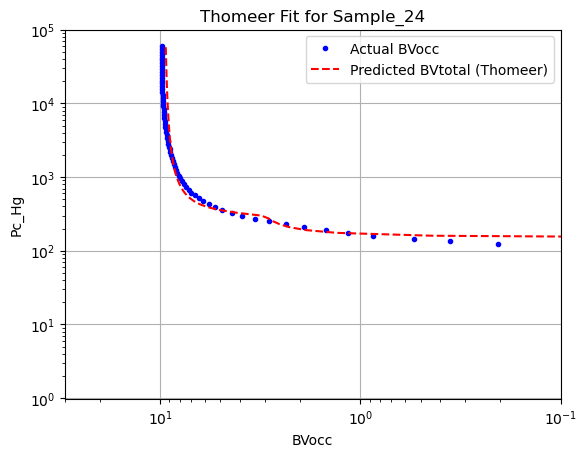




Pd1_calc= 100.86

Optimized parameters for Sample_25: 

 BV1=3.58, , G1=0.2, Pd1=52.41, 

 BV2=2.22,    G2=0.13, Pd2=1000.0

Final minimized error (MSE): 0.0829


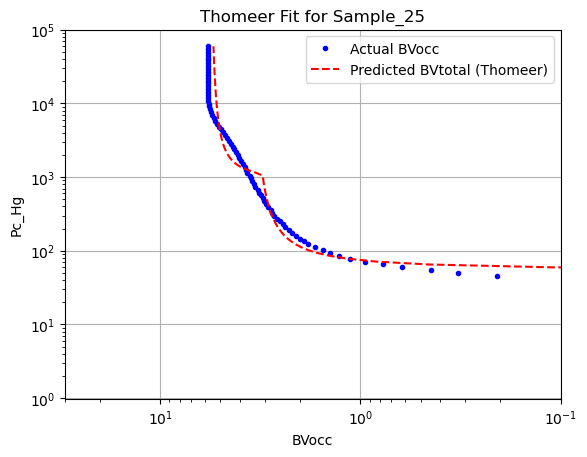




Pd1_calc= 348.76

Optimized parameters for Sample_26: 

 BV1=1.84, , G1=0.14, Pd1=523.15, 

 BV2=4.06,    G2=0.14, Pd2=88.72

Final minimized error (MSE): 0.0394


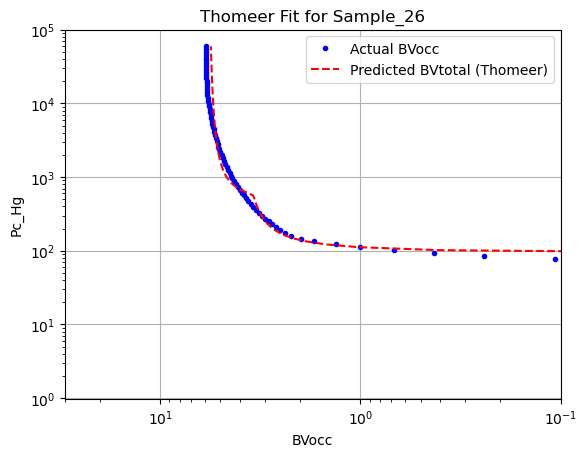




Pd1_calc= 113.76

Optimized parameters for Sample_27: 

 BV1=2.25, , G1=0.26, Pd1=170.64, 

 BV2=9.05,    G2=0.09, Pd2=145.69

Final minimized error (MSE): 0.3122


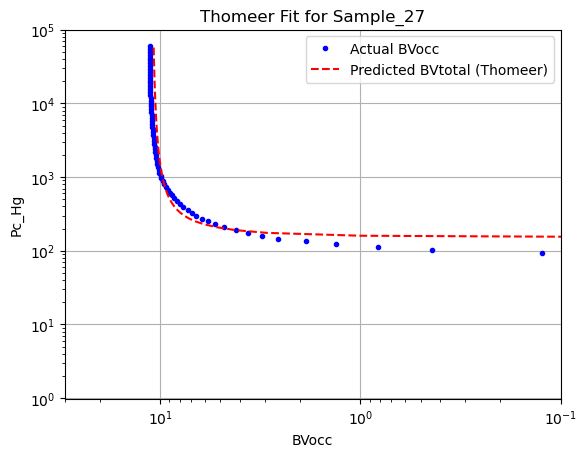




Pd1_calc= 8.67

Optimized parameters for Sample_28: 

 BV1=13.7, , G1=0.27, Pd1=9.62, 

 BV2=0.0,    G2=0.01, Pd2=146.0

Final minimized error (MSE): 0.3234


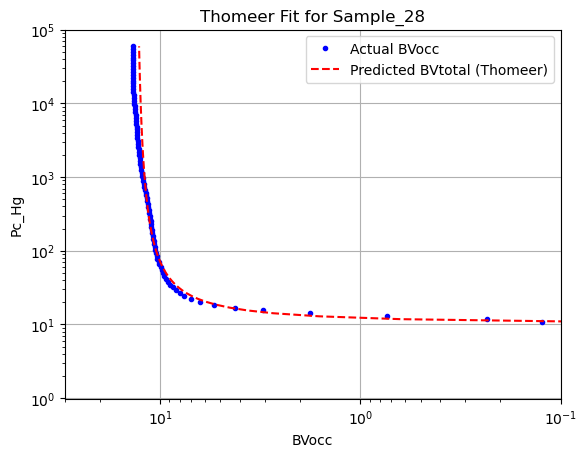




Pd1_calc= 135.42

Optimized parameters for Sample_29: 

 BV1=6.92, , G1=0.08, Pd1=164.4, 

 BV2=6.28,    G2=0.09, Pd2=432.98

Final minimized error (MSE): 0.1567


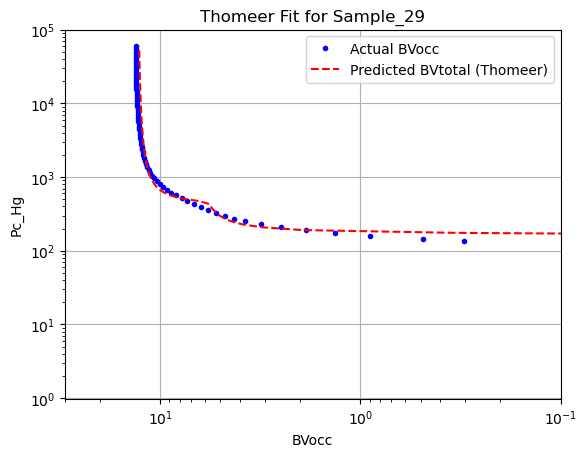




Pd1_calc= 149.64

Optimized parameters for Sample_30: 

 BV1=1.36, , G1=0.29, Pd1=224.46, 

 BV2=7.34,    G2=0.18, Pd2=75.12

Final minimized error (MSE): 0.174


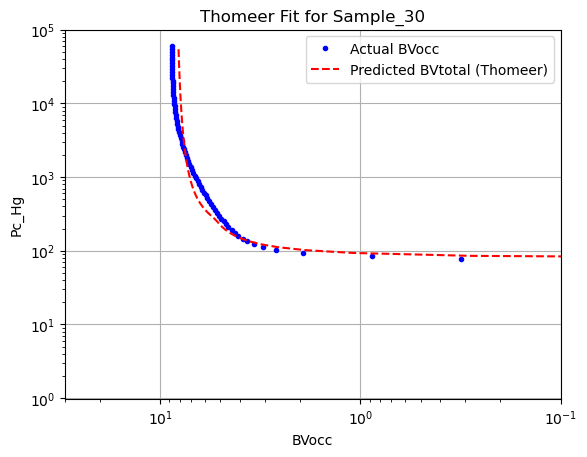




Pd1_calc= 13.49

Optimized parameters for Sample_31: 

 BV1=13.09, , G1=0.15, Pd1=17.82, 

 BV2=1.81,    G2=0.06, Pd2=519.13

Final minimized error (MSE): 0.1224


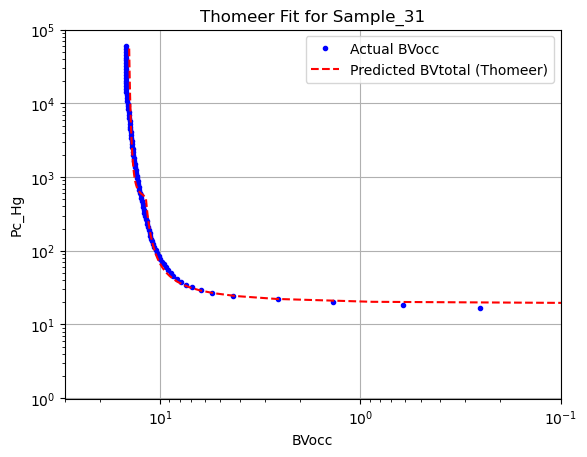




Pd1_calc= 446.18

Optimized parameters for Sample_32: 

 BV1=2.44, , G1=0.17, Pd1=669.26, 

 BV2=4.66,    G2=0.11, Pd2=319.28

Final minimized error (MSE): 0.0969


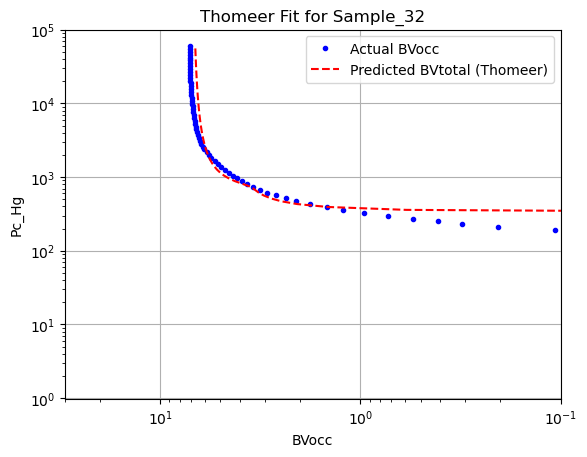




Pd1_calc= 2.68

Optimized parameters for Sample_33: 

 BV1=13.86, , G1=0.29, Pd1=2.89, 

 BV2=2.74,    G2=0.07, Pd2=50.0

Final minimized error (MSE): 0.4806


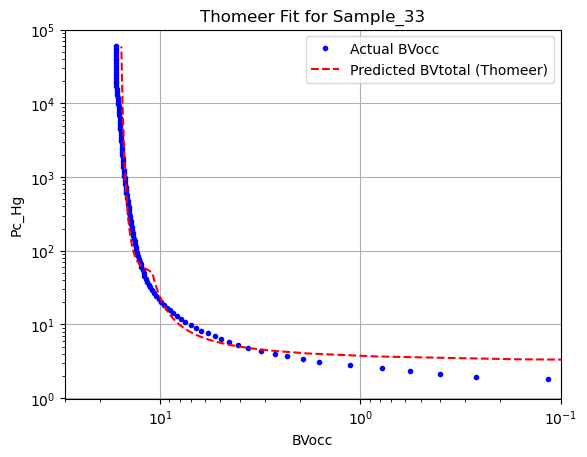




Pd1_calc= 0.88

Optimized parameters for Sample_34: 

 BV1=17.77, , G1=0.41, Pd1=1.32, 

 BV2=1.83,    G2=0.01, Pd2=53.39

Final minimized error (MSE): 1.2437


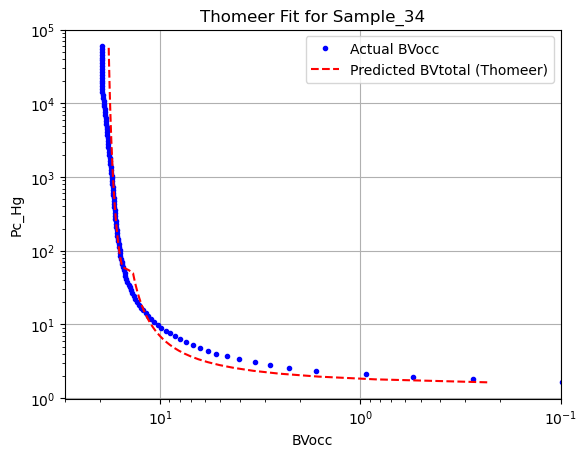

Bad result, optimization error is too high.



Pd1_calc= 204.59

Optimized parameters for Sample_35: 

 BV1=4.19, , G1=0.19, Pd1=306.88, 

 BV2=5.51,    G2=0.07, Pd2=137.13

Final minimized error (MSE): 0.1142


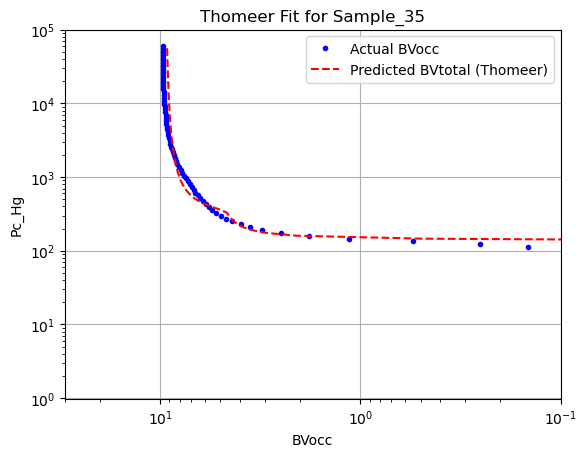

In [12]:
# This works pretty well

# Loop through all samples
for Sample in data_dict.keys():
    sample_data = data_dict[Sample]

    porosity_sample = sample_data['Porosity (%)']
    perm_sample = sample_data['Permeability']
    Num_pore_sys = sample_data['Num_pore_sys']

    Pc = sample_data['Pc']
    Sw = sample_data['Sw']
    BVocc = ((100 - Sw) / 100) * porosity_sample
    BVmax = np.max(BVocc)

    # Calculate BVtotal using Thomeer hyperbolic equations
    def model_function(BV1, G1, Pd1, G2, Pd2):
        BV2 = BVmax - BV1  # Calculate BV2 from BVtotal - BV1

        BVOCC1 = np.where(Pc >= Pd1, BV1 * 10 ** ((-0.434 * G1) / np.log10(Pc / Pd1)), 0.001)
        BVOCC2 = np.where(Pc >= Pd2, BV2 * 10 ** ((-0.434 * G2) / np.log10(Pc / Pd2)), 0.001)

        BV_total = BVOCC1 + BVOCC2
        return BV_total

    # Define the objective function
    def objective_function(params, Pc, BVocc):
        BV1, G1, Pd1, G2, Pd2 = params

        # Create an empty list for predicted values
        bvarray_pred = []

        # Loop through each Pc value to calculate BVOCC
        for Pc_value in Pc:
            BV2 = BVmax - BV1

            # Calculate BVOCC1 based on condition of Pc and Pd1
            if Pc_value >= Pd1:
                BVOCC1 = BV1 * 10**((-0.434 * G1) / np.log10(Pc_value / Pd1))
            else:
                BVOCC1 = 0.001  # Set to 0.001 when Pc < Pd1

            # Calculate BVOCC2 based on condition of Pc and Pd2
            if Pc_value >= Pd2:
                BVOCC2 = BV2 * 10**((-0.434 * G2) / np.log10(Pc_value / Pd2))
            else:
                BVOCC2 = 0.001  # Set to 0.001 when Pc < Pd2

            # Calculate total BVOCC
            BVOCC = BVOCC1 + BVOCC2

            # Ensure BVOCC does not exceed BVmax
            if BVOCC > BVmax:
                BVOCC = BVmax

            # Append the calculated value to the list
            bvarray_pred.append(BVOCC)

        # Calculate the mean squared error between actual and predicted BVocc
        error = np.mean((BVocc - bvarray_pred) ** 2)
        return error


    #Perm = 10**(3.33 - 1.71 * log10(Pd1))
    #log10(Perm) = 3.33 - 1.71 * log10(Pd1)
    #(log10(Perm) - 3.33) = -1.71 * log10(Pd1)
    
    Pd1_calc =  10**((np.log10(perm_sample) - 3.33)/-1.71)
    
    # Initial guesses for the parameters (BV1, G1,   Pd1,       G2,   Pd2)
    initial_guess        = [np.max(BVocc)*0.7, 0.6,  Pd1_calc,  0.1,  200]

    # Define bounds for each parameter (keep them reasonable)
    bounds = [
        (0, np.max(BVocc)),  # BV1 bounds
        (0.01, 2),           # G1 bounds
        (Pd1_calc*0.5, Pd1_calc*1.5),            # Pd1 bounds
        (0.01, 2),           # G2 bounds
        (50, 1000)           # Pd2 bounds
    ]

    # Optimize the parameters using Powell method
    result = minimize(objective_function, initial_guess, args=(Pc, BVocc), method='Powell', bounds=bounds)

    # Extract optimized parameters
    BV1_opt, G1_opt, Pd1_opt, G2_opt, Pd2_opt = result.x

    # Print optimized parameters and minimized error
    minimized_error = result.fun


    print()
    print()
    print()
    print('Pd1_calc=',round(Pd1_calc,2))
    print()
    #print(f"Optimized parameters for {Sample}: \n BV1={round(BV1_opt,2)}, BV2={round(BVmax - BV1_opt,2)}, G1={round(G1_opt,2)}, Pd1={round(Pd1_opt,2)}, G2={round(G2_opt,2)}, Pd2={round(Pd2_opt,2)}")
    print(f"Optimized parameters for {Sample}: \n\n BV1={round(BV1_opt,2)}, , G1={round(G1_opt,2)}, Pd1={round(Pd1_opt,2)}, \n\n BV2={round(BVmax - BV1_opt,2)},    G2={round(G2_opt,2)}, Pd2={round(Pd2_opt,2)}")
    print()
    print(f"Final minimized error (MSE): {round(minimized_error,4)}")

    # Generate the final plot
    BV_total_pred = model_function(BV1_opt, G1_opt, Pd1_opt, G2_opt, Pd2_opt)

    # Plot the actual vs predicted BVocc vs Pc curve
    fig, ax = plt.subplots()
    ax.plot(BVocc, Pc, 'bo', markersize=3, label='Actual BVocc')
    ax.plot(BV_total_pred, Pc, 'r--', label='Predicted BVtotal (Thomeer)')
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlim(30, 0.1)
    #ax.set_xscale('linear')
    ax.set_xlabel('BVocc')
    ax.set_ylabel('Pc_Hg')
    ax.set_title(f'Thomeer Fit for {Sample}')
    ax.grid(True)
    ax.legend()

    plt.show()


    # Optionally save the optimization results to an Excel file
    output_excel_file = 'Sample_Optimization_Results_Optimization_Method_Thomeer.xlsx'

    error_threshold = 1.0  # Define an appropriate threshold

    
    if minimized_error > error_threshold:
        print("Bad result, optimization error is too high.")
    else:
        #print("Good result, acceptable optimization error.")

        
        data_to_save = {
            'Sample': Sample,
            'Porosity (%)': porosity_sample,
            'Permeability (mD)': perm_sample,
            'BV1': round(BV1_opt, 2),
            'G1': round(G1_opt, 2),
            'Pd1': round(Pd1_opt, 2),
            'BV2': round(BVmax - BV1_opt,2),
            'G2': round(G2_opt, 2),
            'Pd2': round(Pd2_opt, 2),
            'minimized_error': round(minimized_error, 6),
            'Num_pore_sys': Num_pore_sys,
        }

        '''if w1_opt > 0.9:
            data_to_save = {
                'Pc_batch': Pc_batch,
                'Sample': Sample,
                'Porosity (%)': porosity_sample,
                'Permeability (mD)': perm_sample,
                'PDF Multiplier': round(mul, 3),
                'w1': round(w1_opt, 3),
                'mu1 (microns)': round(np.exp(mu1_opt), 2),
                'mu2 (microns)': .01,
                'sigma1': round(sigma1_opt, 2),
                'sigma2': .01,
                'minimized_error': round(minimized_error, 6),
                'Num_pore_sys': Num_pore_sys,
            }
            
        if w1_opt < 0.15:
            data_to_save = {
                'Pc_batch': Pc_batch,
                'Sample': Sample,
                'Porosity (%)': porosity_sample,
                'Permeability (mD)': perm_sample,
                'PDF Multiplier': round(mul, 3),
                'w1': round(1-w1_opt, 3),
                'mu1 (microns)': round(np.exp(mu2_opt), 2),
                'mu2 (microns)': .01,
                'sigma1': round(sigma2_opt, 2),
                'sigma2': .01,
                'minimized_error': round(minimized_error, 6),
                'Num_pore_sys': Num_pore_sys,
            }'''
             
        
        df = pd.DataFrame([data_to_save])
    
        # Check if the file already exists
        if os.path.exists(output_excel_file):
            with pd.ExcelWriter(output_excel_file, mode='a', if_sheet_exists='overlay', engine='openpyxl') as writer:
                df.to_excel(writer, index=False, header=False, startrow=writer.sheets['Sheet1'].max_row)
        else:
            df.to_excel(output_excel_file, index=False)






# Load Data and run each sample in Automatic Mode:

HPMI Data from Ed Clerke Thomeer type Spreadsheet that he gives out.

In [6]:

# Specify the file path and sheet number
file_path = 'Sample_Optimization_Results_Optimization_Method_Thomeer.xlsx'

# Read the specific range from the sheet
df = pd.read_excel(file_path)

df.head()

,Sample,Porosity (%),Permeability (mD),BV1,G1,Pd1,BV2,G2,Pd2,minimized_error,Num_pore_sys
0,Sample_2,14.5,41.40,13.30,0.26,5.32,1.20,0.03,704.18,0.160770,2
1,Sample_3,14.5,41.40,13.16,0.22,7.80,1.34,0.02,775.86,0.179700,2
2,Sample_4,13.9,6.88,12.40,0.25,14.34,1.50,0.73,174.11,0.583785,2
3,Sample_5,13.9,6.88,11.69,0.25,14.34,2.21,0.04,406.19,0.348518,2
4,Sample_6,12.1,3.00,10.81,0.22,26.88,1.29,0.04,926.79,0.143372,2


In [7]:
# Assuming porosity and permeability data are stored in numpy arrays
porosity = df['Porosity (%)']
permeability = df['Permeability (mD)']  # Replace with actual permeability data
df['lperm'] = np.log10(df['Permeability (mD)'])  # Replace with actual permeability data
lperm = df['lperm']
BV1 = df['BV1']  # Replace with actual permeability data
G1 = df['G1']  # Replace with actual permeability data
Pd1 = df['Pd1']  # Replace with actual permeability data
BV2 = df['BV2']
G2 = df['G2']  # Replace with actual permeability data
Pd2 = df['Pd2']  # Replace with actual permeability data
Mode = np.exp(-1.15*G1)*(214/Pd1)/2

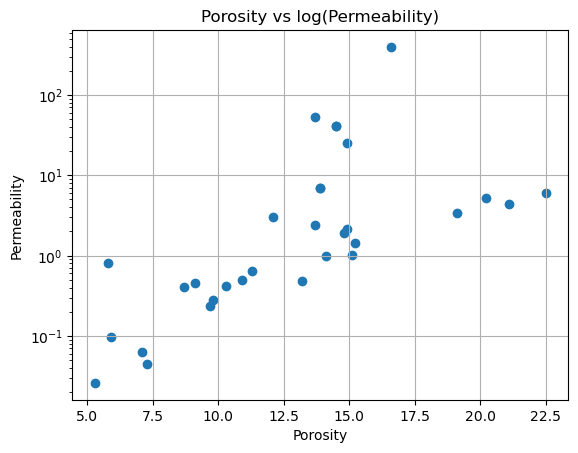

In [8]:
plt.scatter(porosity, permeability)
plt.xlabel('Porosity')
plt.ylabel('Permeability')
plt.title('Porosity vs log(Permeability)')
plt.yscale('log')
plt.grid()

plt.show()


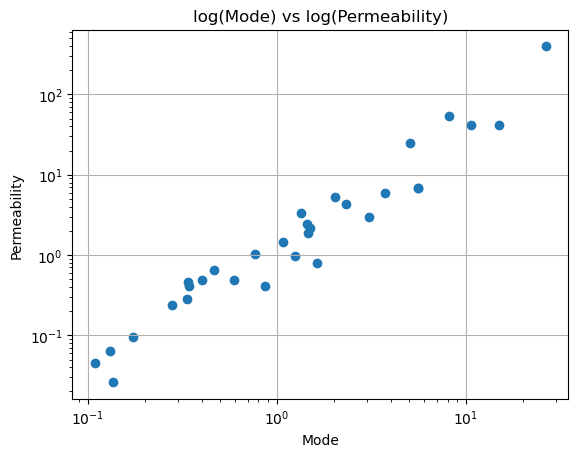

In [9]:
plt.scatter(Mode, permeability)
plt.xlabel('Mode')
plt.ylabel('Permeability')
plt.title('log(Mode) vs log(Permeability)')
plt.xscale('log')
plt.yscale('log')
plt.grid()

plt.show()


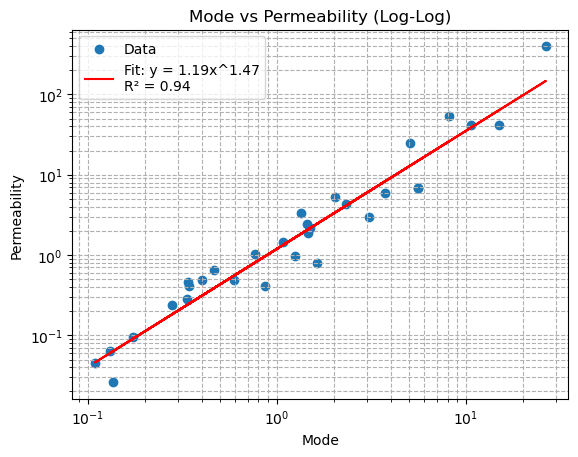

In [10]:
# Log-transform the data for linear regression
log_mu1 = np.log(Mode)
log_perm = np.log(permeability)

# Perform linear regression on the log-transformed data
slope, intercept = np.polyfit(log_mu1, log_perm, 1)

# Calculate the predicted values in log scale
log_perm_pred = slope * log_mu1 + intercept

# Convert the predicted log-permeability back to the original scale
perm_pred = np.exp(log_perm_pred)

# Calculate R² for the log-log regression
ss_res = np.sum((log_perm - log_perm_pred) ** 2)  # Residual sum of squares in log scale
ss_tot = np.sum((log_perm - np.mean(log_perm)) ** 2)  # Total sum of squares in log scale
r2 = 1 - (ss_res / ss_tot)

# Plot the scatter plot in log-log scale
plt.scatter(Mode, permeability, label='Data')

# Plot the regression line in the original scale
plt.plot(Mode, perm_pred, color='red', label=f'Fit: y = {np.exp(intercept):.2f}x^{slope:.2f}\nR² = {r2:.2f}')

# Add labels, title, and grid
plt.xlabel('Mode')
plt.ylabel('Permeability')
plt.title('Mode vs Permeability (Log-Log)')
plt.xscale('log')
plt.yscale('log')
plt.grid(True, which='both', ls='--')

# Add legend for the regression equation and R²
plt.legend()

# Show the plot
plt.show()
